In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [2]:
import os

import numpy as np
import pandas as pd

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from matplotlib.image import imread
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
SEED = 257

TRAIN_DIR = 'train/'
TEST_DIR = 'test/'

In [4]:
categories = ['hot dog', 'not hot dog']

In [5]:
X, y = [], []

for category in categories:
    category_dir = os.path.join(TRAIN_DIR, category)
    for image_path in os.listdir(category_dir):
        X.append(imread(os.path.join(category_dir, image_path)))
        y.append(category)

In [6]:
len(X), len(y)

(10049, 10049)

In [7]:
X[0].shape

(100, 100, 3)

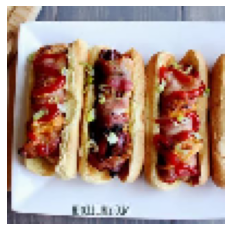

In [8]:
plt.axis("off");
plt.imshow(X[100]);

# train-test split

In [83]:
y = [1 if x == 'hot dog' else 0 for x in y]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.25, random_state=SEED)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7536, 100, 100, 3), (2513, 100, 100, 3), (7536,), (2513,))

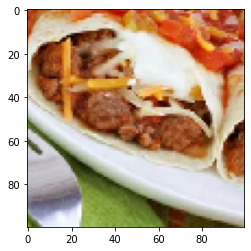

In [12]:
plt.imshow(X_train[7534]);

# 1

In [87]:
img_rows = 100
img_cols = 100


In [88]:
num_classes = 2

In [ ]:
X_train[0].shape

In [89]:
K.image_data_format()

'channels_last'

In [90]:
if K.image_data_format() == 'channels_first':
    x_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    x_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

In [93]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

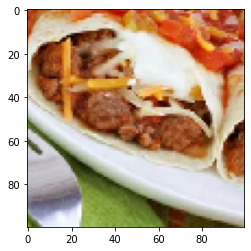

In [94]:
plt.imshow(x_train[7534]);

In [95]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [96]:
y_train = y_train.reshape((-1,2))

In [219]:
datagen = ImageDataGenerator(

)
train_iterator = datagen.flow(x_train, y_train, batch_size=4)

In [99]:
batch_size = 128
epochs = 3

In [100]:
from tensorflow import keras

In [101]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [102]:
from tensorflow.keras.optimizers import Adam

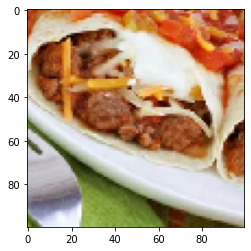

In [221]:
plt.imshow(x_train[7534]);

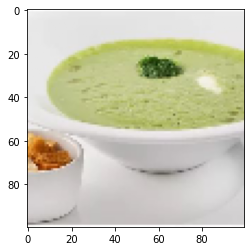

In [104]:
plt.imshow(x_test[2]);

In [60]:
model = Sequential() # input: 32x32x3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) # 32xAxB
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) # 64xCxD
model.add(MaxPooling2D(pool_size=(2, 2))) # 64xExF
model.add(Flatten()) # (64 * E * F) x 1
model.add(Dense(128, activation='relu')) # it needs Hx1
model.add(Dense(num_classes, activation='softmax'))

In [61]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [62]:
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/3
59/59 [==============================] - 301s 5s/step - loss: 1.8012 - accuracy: 0.8275 - val_loss: 0.3573 - val_accuracy: 0.8794
Epoch 2/3
59/59 [==============================] - 275s 5s/step - loss: 0.3588 - accuracy: 0.8714 - val_loss: 0.3100 - val_accuracy: 0.8854
Epoch 3/3
59/59 [==============================] - 249s 4s/step - loss: 0.2775 - accuracy: 0.8935 - val_loss: 0.2964 - val_accuracy: 0.8961


In [222]:
model.fit_generator(
    train_iterator, 
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

C:\Users\diana\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
roc_auc_score(y_test, model.predict(x_test))

# transfer learning

In [105]:
from keras.applications.xception import Xception, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.models import model_from_json
from keras.optimizers import Nadam
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import MaxPooling2D

In [152]:
base_model = Xception(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(200,activation='elu')(x)
x = Dropout(0.4)(x)
x = Dense(170,activation='elu')(x)
predictions = Dense(2, activation='softmax')(x)

In [153]:
model2 = Model(inputs=base_model.input, outputs=predictions)


In [154]:
for layer in base_model.layers:
    layer.trainable = False

In [155]:
model2.compile(optimizer=Nadam(lr=0.0001), 
loss='binary_crossentropy',metrics=['accuracy'])


In [223]:
model2.fit_generator(
    train_iterator, 
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/3
1884/1884 [==============================] - 486s 258ms/step - loss: 0.1579 - accuracy: 0.9427 - val_loss: 0.1537 - val_accuracy: 0.9455
Epoch 2/3
1884/1884 [==============================] - 484s 257ms/step - loss: 0.1391 - accuracy: 0.9500 - val_loss: 0.1402 - val_accuracy: 0.9459
Epoch 3/3
1884/1884 [==============================] - 468s 248ms/step - loss: 0.1243 - accuracy: 0.9569 - val_loss: 0.1483 - val_accuracy: 0.9491


In [224]:
roc_auc_score(y_test, model2.predict(x_test))

0.9580779684303273

# predictions 

In [230]:
leaderboard_X = []
leaderboard_filenames = []

In [231]:
for image_path in os.listdir(TEST_DIR):
    leaderboard_X.append(imread(os.path.join(TEST_DIR, image_path)))
    leaderboard_filenames.append(image_path)

In [232]:
print(leaderboard_X[0].shape, leaderboard_filenames[0])

(100, 100, 3) 0003a33387289b715622ad0c3e2b5e8ba075269ad61c80b76185e40b7e33bf1c.png


In [234]:
X_test_t = np.array(leaderboard_X)

In [239]:
leaderboard_predictions = model2.predict(X_test_t)[:,1]



In [240]:
leaderboard_predictions = leaderboard_predictions.tolist()

In [242]:
font = {
    'family': 'serif',
    'color':  'darkred',
    'weight': 'bold',
    'size': 22,
}

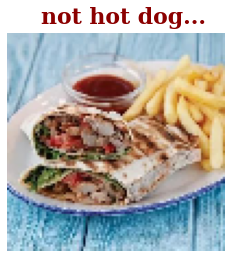

In [258]:
idx = 54

plt.axis("off");
if leadeboard_predictions[idx] > 0.5:
    plt.text(20, -5, 'HOT DOG!!!', fontdict=font)
else:
    plt.text(15, -5,'not hot dog...', fontdict=font)
plt.imshow(leaderboard_X[idx]);

In [249]:
submission = pd.DataFrame(
    {
        'image_id': leaderboard_filenames, 
        'image_hot_dog_probability': leaderboard_predictions}
)

In [253]:
submission.to_csv(path_or_buf='submission_hotdogs3.csv', index=False)

In [260]:
submission.head()

,image_id,image_hot_dog_probability
0,0003a33387289b715622ad0c3e2b5e8ba075269ad61c80...,1.036066e-08
1,000ac21f4a7ead096d4797eed62fbe308665044e27d550...,9.251274e-01
2,000ef9d107017bb2190a88a5c70adeb5941f22ab7a952f...,8.097436e-05
3,002c5ef1a07ee819724f2e548a6e036908abc784d7ff59...,9.980329e-01
4,003f5ca3f01c6a94b51dc8b019261e827b2dd2888a2ce9...,6.300958e-08
